# Classification with Decision Tree


In [1]:
import numpy as np
import pandas as pd
from data_treatment import DataAtts
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import export_graphviz # Decision tree from sklearn

import pydotplus # Decision tree plotting
from IPython.display import Image

import ipywidgets as widgets
import glob

In [2]:
files_dropdown = widgets.Dropdown(
    options=glob.glob("original_data/*.csv"),
    description='Original file:',
    value = 'original_data/diabetes_escalonated.csv',
    disabled=False,
)
display(files_dropdown)



Dropdown(description='Original file:', index=4, options=('original_data/creditcard.csv', 'original_data/data.c…

In [64]:
folder_name = files_dropdown.value[14:-4]
print(folder_name)
fake_files_dropdown = widgets.Dropdown(
    options=glob.glob("fake_data/" + folder_name + "/*.csv"),
    description='Fake file:',
    disabled=False,
)
display(fake_files_dropdown)

data


Dropdown(description='Fake file:', options=('fake_data/data/2_epochs-3_layer-2_lr-0.0002_batch-5_arc-128,25_si…

In [65]:
file_name=files_dropdown.value
dataAtts = DataAtts(file_name)
    
data = pd.read_csv(file_name)
fake_data = pd.read_csv(fake_files_dropdown.value)
data.shape

(569, 32)

In [66]:
# Treatting the fake data
fake_data.loc[getattr(fake_data, dataAtts.class_name) >= 0.5, dataAtts.class_name] = 1
fake_data.loc[getattr(fake_data, dataAtts.class_name) < 0.5, dataAtts.class_name] = 0

In [67]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [68]:

fake_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.288293,0.0,-0.197225,-0.470031,0.367071,-0.440428,0.246763,0.181016,0.000362,-0.323513,...,-0.118938,0.295632,0.365029,-0.232468,0.271289,0.217040,0.104886,-0.216942,-0.468229,0.304389
1,-0.298612,0.0,-0.195045,-0.462769,0.360797,-0.441394,0.241437,0.171455,0.009863,-0.319041,...,-0.118257,0.282169,0.366079,-0.219903,0.270318,0.196978,0.099899,-0.223363,-0.447766,0.298283
2,-0.300072,0.0,-0.207574,-0.460431,0.364993,-0.435256,0.242687,0.174251,0.014470,-0.318729,...,-0.117744,0.277487,0.362565,-0.219438,0.266831,0.200008,0.100513,-0.228089,-0.444049,0.295486
3,-0.308955,0.0,-0.198560,-0.460769,0.363188,-0.443550,0.230534,0.175924,0.008320,-0.311082,...,-0.115476,0.285411,0.366480,-0.226072,0.275174,0.197132,0.096808,-0.218769,-0.450316,0.300838
4,-0.290065,0.0,-0.198971,-0.467830,0.366570,-0.442055,0.247292,0.171397,0.003720,-0.323904,...,-0.119163,0.293992,0.366177,-0.230781,0.269342,0.210700,0.100661,-0.223361,-0.458705,0.303535


In [69]:
print("Original Data")
print("Outcome = 0: ", round(data[dataAtts.class_name].value_counts()[0]/len(data) * 100,2), '%  of the dataset')
print("Outcome = 1: ", round(data[dataAtts.class_name].value_counts()[1]/len(data) * 100,2), '%  of the dataset\n')


print("Fake Data")
try:
    positive=str(round(fake_data[dataAtts.class_name].value_counts()[0]/len(fake_data) * 100,2))
except:
    positive="0"
try:
    negative=str(round(fake_data[dataAtts.class_name].value_counts()[1]/len(fake_data) * 100,2))
except:
    negative="0"
    

print("Outcome = 0: ", positive, '%  of the dataset')
print("Outcome = 1: ", negative, '%  of the dataset')


Original Data
Outcome = 0:  62.74 %  of the dataset
Outcome = 1:  37.26 %  of the dataset

Fake Data
Outcome = 0:  100.0 %  of the dataset
Outcome = 1:  0 %  of the dataset


In [70]:
original_data_training_set = data.head(int(data.shape[0]*0.7))
fake_data_training_set  = fake_data.head(int(fake_data.shape[0]*0.7))
original_data_testing_set  = data.tail(int(data.shape[0]*0.3))
fake_data_testing_set  = fake_data.tail(int(fake_data.shape[0]*0.3))
mixed_data_training_set=pd.concat([original_data_training_set, fake_data_training_set])
mixed_data_testing_set=pd.concat([original_data_testing_set, fake_data_testing_set])

In [71]:
train = fake_data_training_set
test = original_data_testing_set

In [72]:
trainX = train.drop(dataAtts.class_name, 1)
testX = test.drop(dataAtts.class_name, 1)
y_train = train[dataAtts.class_name]
y_test = test[dataAtts.class_name]
#trainX = pd.get_dummies(trainX)

clf1 = DT(max_depth = 3, min_samples_leaf = 1)
clf1 = clf1.fit(trainX,y_train)

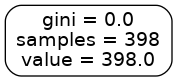

In [73]:
export_graphviz(clf1, out_file="models/tree.dot", feature_names=trainX.columns, class_names=["0","1"], filled=True, rounded=True)
g = pydotplus.graph_from_dot_file(path="models/tree.dot")
Image(g.create_png())

In [76]:
pred = clf1.predict_proba(testX)
print(pred)
if pred.shape[1] > 1:
    pred = np.argmax(pred, axis=1)
else:
    pred = pred.reshape((pred.shape[0]))
    if negative=="0":
        pred = pred-1
print(pred)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [46]:
mse = ((pred - y_test.values)**2).mean(axis=0)
mse

0.7705882352941177

In [48]:
print("\nTest Data")
print("Outcome = 0: ", round(test[dataAtts.class_name].value_counts()[0]/len(test) * 100,2), '%  of the dataset')
print("Outcome = 1: ", round(test[dataAtts.class_name].value_counts()[1]/len(test) * 100,2), '%  of the dataset\n')


Test Data
Outcome = 0:  77.06 %  of the dataset
Outcome = 1:  22.94 %  of the dataset

